W pliku **Historia_przejazdow.csv** znajdziesz dane na temat wypożyczeń Wrocławskich Rowerów Miejskich - aktualne dane możesz znaleźć [tutaj](https://www.wroclaw.pl/open-data/dataset/wrmprzejazdy_data). Jeżeli masz problemy z polskimi literami, to plik jest kodowany za pomocą kodowania 'Windows-1250'.

Przeczytaj dane z pliku, a następnie wybierz tylko te, w których stacje wynajmu i zwrotu są takie same, a wypożyczenia krótsze niż 100 minut. Pokaż na wykresie ile było wypożyczeń o danym czasie trwania (pierwszy słupek: wypożyczenia o czasie trwania jednej minuty, drugi - dwóch minut, itd.).

Wypożyczenia które zaczynają się i kończą na tej samej stacji oraz trwają nie dłużej niż 3 minuty to prawdopodobnie wypożyczenia uszkodzonych rowerów, które użytkownik oddaje zaraz po tym jak zda sobie sprawę z awarii. Narysuj czerwoną linię, która oddzieli wypożyczenia krótsze i dłuższe od 3 minut. 

Dodaj też do niej adnotację tłumaczącą czym jest ta linia.

In [1]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv(os.path.join("..", "01_Dane do wykresów", "Historia_przejazdow.csv"), sep=",", encoding="Windows-1250")

In [5]:
df.head()

,UID wynajmu,Numer roweru,Data wynajmu,Data zwrotu,Stacja wynajmu,Stacja zwrotu,Czas trwania
0,112512738,57243,2021-03-03 23:41:47,2021-03-04 00:00:34,Plac Grunwaldzki / Polaka,Poza stacją,19
1,112512783,57434,2021-03-03 23:46:14,2021-03-04 00:00:41,Bezpieczna/Jugosławiańska,Kurkowa / Dubois,15
2,112512778,650040,2021-03-03 23:45:30,2021-03-04 00:02:33,al. Kochanowskiego / Kopernika,Rondo Reagana,18
3,112512869,57441,2021-03-03 23:53:59,2021-03-04 00:05:08,Plac Świętego Macieja / Trzebnicka,Nowowiejska / Górnickiego,12
4,112512830,651044,2021-03-03 23:50:10,2021-03-04 00:07:12,Powstańców Śląskich/Orla,Szewska / Kazimierza Wielkiego,18


In [7]:
df.sample(10)

,UID wynajmu,Numer roweru,Data wynajmu,Data zwrotu,Stacja wynajmu,Stacja zwrotu,Czas trwania
2303,112538772,57630,2021-03-04 17:31:00,2021-03-04 17:42:51,Młodych Techników,Legnicka (Park Magnolia),12
1938,112534890,650084,2021-03-04 16:18:42,2021-03-04 16:33:14,Plac Dominikański (Galeria Dominikańska),Plac Świętego Macieja / Trzebnicka,15
1368,112529694,650422,2021-03-04 14:32:04,2021-03-04 14:51:04,Świeradowska / Krynicka,Szewska / Kazimierza Wielkiego,19
2066,112536194,57527,2021-03-04 16:43:05,2021-03-04 16:52:39,Zaporoska / Gajowicka,Aleja Hallera / Mielecka,10
1831,112533049,57450,2021-03-04 15:42:50,2021-03-04 16:11:55,Kraszewskiego / Trzebnicka,Promenady Wrocławskie,30
1292,112529544,57156,2021-03-04 14:28:34,2021-03-04 14:36:20,Strzegomska / Estońska,Graniczna / Strzegomska,8
877,112524991,651205,2021-03-04 12:35:03,2021-03-04 12:37:05,Opolska / pętla tramwajowa,Opolska / pętla tramwajowa,3
2429,112540552,57641,2021-03-04 18:04:57,2021-03-04 18:20:00,Hubska / Prudnicka,Plac Legionów,16
824,112523706,57104,2021-03-04 11:55:50,2021-03-04 12:07:06,Komandorska / Kamienna,Rynek,12
394,112517420,57154,2021-03-04 08:15:38,2021-03-04 08:27:38,Nyska / Jesionowa,Ślężna / Aleja Wiśniowa,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3067 entries, 0 to 3066
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   UID wynajmu     3067 non-null   int64 
 1   Numer roweru    3067 non-null   int64 
 2   Data wynajmu    3067 non-null   object
 3   Data zwrotu     3067 non-null   object
 4   Stacja wynajmu  3067 non-null   object
 5   Stacja zwrotu   3067 non-null   object
 6   Czas trwania    3067 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 167.9+ KB


#### powyżej widać, że w danych jest coś nie tak - daty są object a powinny mieć format daty; da się to zrobić przy wczytywaniu danych, jedna w tym przykłądzie zrobię to poniżej 'ręcznie' ;)


In [13]:
# zmiana formatu danych object na datowy:
df["Data wynajmu"] = pd.to_datetime(df["Data wynajmu"])

In [15]:
df["Data zwrotu"] = pd.to_datetime(df["Data zwrotu"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3067 entries, 0 to 3066
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   UID wynajmu     3067 non-null   int64         
 1   Numer roweru    3067 non-null   int64         
 2   Data wynajmu    3067 non-null   datetime64[ns]
 3   Data zwrotu     3067 non-null   datetime64[ns]
 4   Stacja wynajmu  3067 non-null   object        
 5   Stacja zwrotu   3067 non-null   object        
 6   Czas trwania    3067 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 167.9+ KB


In [17]:
df.head

<bound method NDFrame.head of       UID wynajmu  Numer roweru        Data wynajmu         Data zwrotu  \
0       112512738         57243 2021-03-03 23:41:47 2021-03-04 00:00:34   
1       112512783         57434 2021-03-03 23:46:14 2021-03-04 00:00:41   
2       112512778        650040 2021-03-03 23:45:30 2021-03-04 00:02:33   
3       112512869         57441 2021-03-03 23:53:59 2021-03-04 00:05:08   
4       112512830        651044 2021-03-03 23:50:10 2021-03-04 00:07:12   
...           ...           ...                 ...                 ...   
3062    112548936         57511 2021-03-04 23:47:37 2021-03-04 23:52:25   
3063    112548810         57137 2021-03-04 23:33:15 2021-03-04 23:52:42   
3064    112548934        651243 2021-03-04 23:47:25 2021-03-04 23:56:43   
3065    112548972        650956 2021-03-04 23:51:43 2021-03-04 23:58:58   
3066    112548907         57625 2021-03-04 23:44:16 2021-03-04 23:59:50   

                                Stacja wynajmu  \
0                  

In [18]:
df.head()

,UID wynajmu,Numer roweru,Data wynajmu,Data zwrotu,Stacja wynajmu,Stacja zwrotu,Czas trwania
0,112512738,57243,2021-03-03 23:41:47,2021-03-04 00:00:34,Plac Grunwaldzki / Polaka,Poza stacją,19
1,112512783,57434,2021-03-03 23:46:14,2021-03-04 00:00:41,Bezpieczna/Jugosławiańska,Kurkowa / Dubois,15
2,112512778,650040,2021-03-03 23:45:30,2021-03-04 00:02:33,al. Kochanowskiego / Kopernika,Rondo Reagana,18
3,112512869,57441,2021-03-03 23:53:59,2021-03-04 00:05:08,Plac Świętego Macieja / Trzebnicka,Nowowiejska / Górnickiego,12
4,112512830,651044,2021-03-03 23:50:10,2021-03-04 00:07:12,Powstańców Śląskich/Orla,Szewska / Kazimierza Wielkiego,18


In [10]:
df.columns

Index(['UID wynajmu', 'Numer roweru', 'Data wynajmu', 'Data zwrotu',
       'Stacja wynajmu', 'Stacja zwrotu', 'Czas trwania'],
      dtype='object')

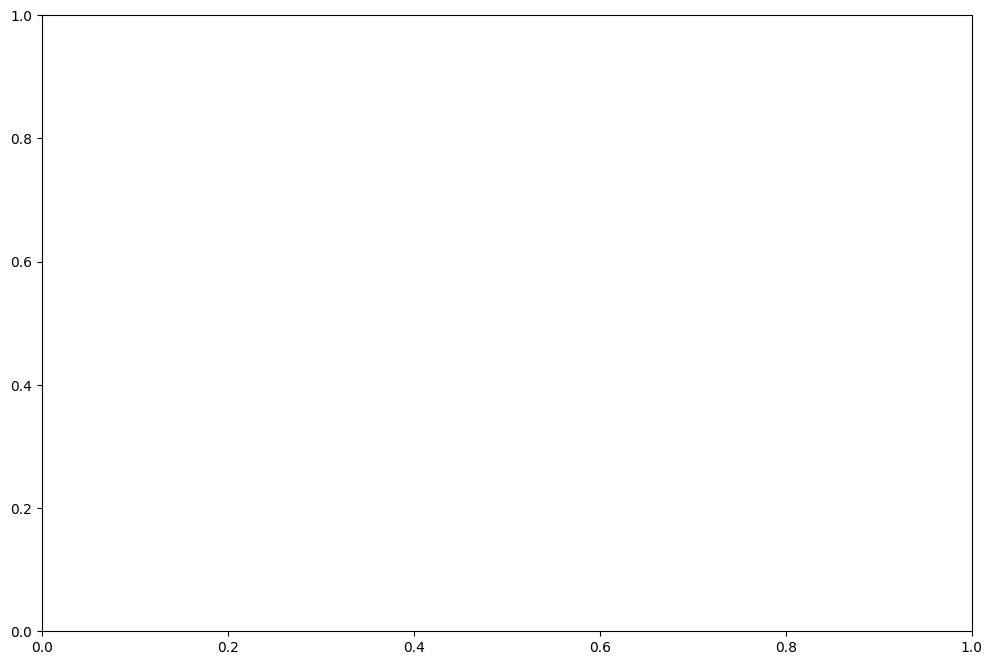

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))